In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import urllib.request
from urllib.request import urlretrieve as urlretrieve
import geopandas as gpd
import os
import json
import requests
import zipfile
import io
from io import StringIO
from fiona.crs import from_epsg
import shapely
from shapely.geometry import Point, LineString
import matplotlib.pylab as plt
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False

In [2]:
# Download the sybway station data
url = "https://data.cityofnewyork.us/api/geospatial/arq3-7z49?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "subway.gz")

('subway.gz', <http.client.HTTPMessage at 0x7f58b83d5278>)

In [3]:
!unzip -d $PUIDATA subway.gz

Archive:  subway.gz
  inflating: /nfshome/ml6506/PUIdata/geo_export_b37fdcb2-4a26-42fe-991f-d81624b83d24.dbf  
  inflating: /nfshome/ml6506/PUIdata/geo_export_b37fdcb2-4a26-42fe-991f-d81624b83d24.shp  
  inflating: /nfshome/ml6506/PUIdata/geo_export_b37fdcb2-4a26-42fe-991f-d81624b83d24.shx  
  inflating: /nfshome/ml6506/PUIdata/geo_export_b37fdcb2-4a26-42fe-991f-d81624b83d24.prj  


In [4]:
subway = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "geo_export_3eab19af-2a60-4abe-a6d0-220af7b510d1.shp")

In [5]:
subway.head()

,line,name,notes,objectid,url,geometry
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99106999861966 40.73005400028978)
1,4-6-6 Express,Canal St,"4 nights, 6-all times, 6 Express-weekdays AM s...",2.0,http://web.mta.info/nyct/service/,POINT (-74.00019299927328 40.71880300107709)
2,1-2,50th St,"1-all times, 2-nights",3.0,http://web.mta.info/nyct/service/,POINT (-73.98384899986625 40.76172799961419)
3,2-3-4,Bergen St,"4-nights, 3-all other times, 2-all times",4.0,http://web.mta.info/nyct/service/,POINT (-73.97499915116808 40.68086213682956)
4,3-4,Pennsylvania Ave,"4-nights, 3-all other times",5.0,http://web.mta.info/nyct/service/,POINT (-73.89488591154061 40.66471445143568)


In [6]:
subway.crs

{'init': 'epsg:4326'}

In [7]:
# Download the NYC boundary data
url = "https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "areafile.gz")

('areafile.gz', <http.client.HTTPMessage at 0x7f58b83e9860>)

In [8]:
!unzip -d $PUIDATA areafile.gz

Archive:  areafile.gz
  inflating: /nfshome/ml6506/PUIdata/geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.dbf  
  inflating: /nfshome/ml6506/PUIdata/geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.shp  
  inflating: /nfshome/ml6506/PUIdata/geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.shx  
  inflating: /nfshome/ml6506/PUIdata/geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.prj  


In [9]:
areashp = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "geo_export_4e31d121-314b-4626-86ee-5857be3e57fb.shp")

In [10]:
areashp.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904861,POLYGON ((-73.80379022888246 40.77561011179248...
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712318,"POLYGON ((-73.86109724335759 40.7636644770869,..."
3,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,POLYGON ((-73.75725671509139 40.71813860166257...
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,POLYGON ((-73.94607828674226 40.82126321606191...


In [11]:
areashp.crs

{'init': 'epsg:4326'}

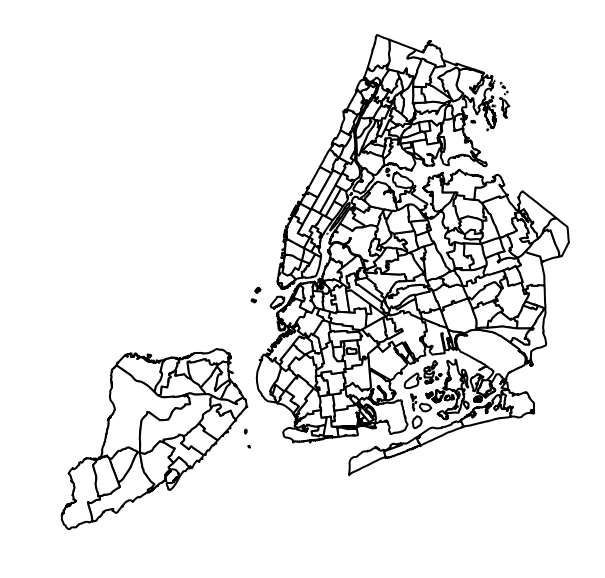

In [12]:
import choroplethNYC as cp
cp.choroplethNYC(areashp, column=None, color="white", edgecolor="black", lw=2);

In [13]:
# spatial join two dataset
pp = gpd.sjoin(subway, areashp, how='inner', op='intersects', lsuffix='left', rsuffix='right')
pp.head()

,line,name,notes,objectid,url,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,4-6-6 Express,Astor Pl,"4 nights, 6-all times, 6 Express-weekdays AM s...",1.0,http://web.mta.info/nyct/service/,POINT (-73.99106999861966 40.73005400028978),178,1.0,Manhattan,061,MN23,West Village,2.500460e+07,29393.935726
83,B-D-F-M,W 4th St - Washington Sq (Lower),"B,M-weekdays and evenings, D,F-all times",84.0,http://web.mta.info/nyct/service/,POINT (-74.00030814755975 40.73225449336788),178,1.0,Manhattan,061,MN23,West Village,2.500460e+07,29393.935726
194,1-2,Christopher St - Sheridan Sq,"1-all times, 2-nights",195.0,http://web.mta.info/nyct/service/,POINT (-74.00290599855235 40.73342200104225),178,1.0,Manhattan,061,MN23,West Village,2.500460e+07,29393.935726
205,A-C-E,W 4th St - Washington Sq (Upper),"A,E-all times, C-all times exc nights",206.0,http://web.mta.info/nyct/service/,POINT (-74.00049500225435 40.73233799774325),178,1.0,Manhattan,061,MN23,West Village,2.500460e+07,29393.935726
383,L,Union Sq - 14th St,L-all times,384.0,http://web.mta.info/nyct/service/,POINT (-73.99066976901818 40.73476331217923),178,1.0,Manhattan,061,MN23,West Village,2.500460e+07,29393.935726


In [14]:
# spatial join two dataset
pp2 = gpd.sjoin(areashp, subway, how='inner', op='intersects', lsuffix='left', rsuffix='right')
pp2.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,index_right,line,name,notes,objectid,url
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,337,F,Ave N,F-all times,338.0,http://web.mta.info/nyct/service/
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,311,N,Ft Hamilton Pkwy,N-all times,312.0,http://web.mta.info/nyct/service/
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,61,D,55th St,D-all times,62.0,http://web.mta.info/nyct/service/
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,310,D,50th St,D-all times,311.0,http://web.mta.info/nyct/service/
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,POLYGON ((-73.94607828674226 40.82126321606191...,171,1,137th St - City College,1-all times,172.0,http://web.mta.info/nyct/service/


In [15]:
pp2.columns

Index(['boro_code', 'boro_name', 'county_fip', 'ntacode', 'ntaname',
       'shape_area', 'shape_leng', 'geometry', 'index_right', 'line', 'name',
       'notes', 'objectid', 'url'],
      dtype='object')

In [16]:
pp2.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,index_right,line,name,notes,objectid,url
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,337,F,Ave N,F-all times,338.0,http://web.mta.info/nyct/service/
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,311,N,Ft Hamilton Pkwy,N-all times,312.0,http://web.mta.info/nyct/service/
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,61,D,55th St,D-all times,62.0,http://web.mta.info/nyct/service/
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,POLYGON ((-73.97604935657381 40.63127590564677...,310,D,50th St,D-all times,311.0,http://web.mta.info/nyct/service/
4,1.0,Manhattan,061,MN06,Manhattanville,1.064708e+07,17040.685413,POLYGON ((-73.94607828674226 40.82126321606191...,171,1,137th St - City College,1-all times,172.0,http://web.mta.info/nyct/service/


In [17]:
ppgb = pp2[['ntaname','name']].groupby("ntaname").count()

In [18]:
ppgbRi = ppgb.reset_index()

In [19]:
ppgbRi

,ntaname,name
0,Airport,1
1,Allerton-Pelham Gardens,2
2,Astoria,5
3,Battery Park City-Lower Manhattan,14
4,Bay Ridge,4
5,Bedford,4
6,Bedford Park-Fordham North,4
7,Bensonhurst East,4
8,Bensonhurst West,9
9,Borough Park,4


In [20]:
pp3 = pd.merge(pp2[['ntaname','geometry']], ppgbRi, on='ntaname', how = 'left')

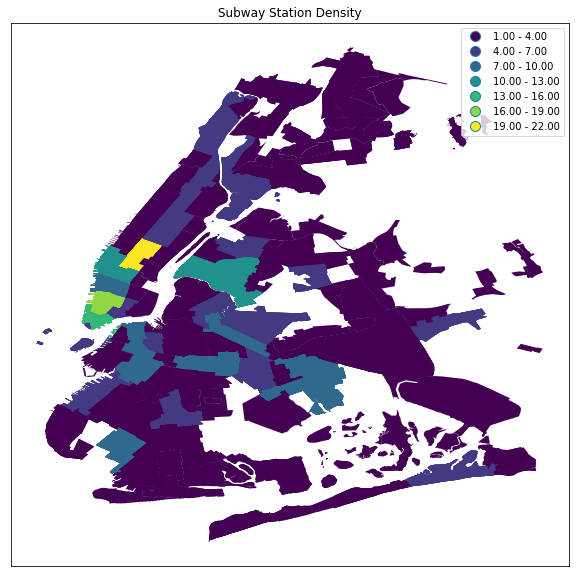

In [21]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
pp3.plot(column='name',cmap='viridis',alpha=1,linewidth=0.1,ax=ax, scheme="Equal_interval", legend=True, k=7)
plt.title("Subway Station Density");

In [22]:
# The number of subway stations in each district
pp[['boro_name','name']].groupby("boro_name").count()

,name
boro_name,
Bronx,70
Brooklyn,169
Manhattan,152
Queens,82
